In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Tentukan direktori data yang baru
data_dir = os.path.join("./../data/clean/")
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory not found: {data_dir}")
else:
    print(f"Directory found: {data_dir}")
    
# Parameter dataset dan model
batch_size = 32
img_height = 180
img_width = 180

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Definisikan model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {test_accuracy}")

# Plot hasil training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Directory found: ./../data/clean/
Found 357 files belonging to 5 classes.
Using 286 files for training.
Found 357 files belonging to 5 classes.
Using 71 files for validation.
Epoch 1/10


c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 618, in run_forever

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1951, in _run_once

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\UsEr\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\UsEr\AppData\Local\Temp\ipykernel_25156\3123685670.py", line 58, in <module>

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 4 which is outside the valid range of [0, 3).  Label values: 3 1 2 1 2 2 1 1 1 3 2 1 2 2 1 1 3 2 3 3 2 2 3 3 4 3 4 1 1 0 4 3
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1973]

Epoch 0, Loss: 1.7893
Epoch 10, Loss: 1.7080
Epoch 20, Loss: 1.6627
Epoch 30, Loss: 1.6422
Epoch 40, Loss: 1.6334
Epoch 50, Loss: 1.6290
Epoch 60, Loss: 1.6261
Epoch 70, Loss: 1.6238
Epoch 80, Loss: 1.6217
Epoch 90, Loss: 1.6196
Epoch 100, Loss: 1.6175
Epoch 110, Loss: 1.6154
Epoch 120, Loss: 1.6131
Epoch 130, Loss: 1.6106
Epoch 140, Loss: 1.6079
Epoch 150, Loss: 1.6050
Epoch 160, Loss: 1.6018
Epoch 170, Loss: 1.5985
Epoch 180, Loss: 1.5948
Epoch 190, Loss: 1.5909
Epoch 200, Loss: 1.5867
Epoch 210, Loss: 1.5822
Epoch 220, Loss: 1.5775
Epoch 230, Loss: 1.5724
Epoch 240, Loss: 1.5671
Epoch 250, Loss: 1.5615
Epoch 260, Loss: 1.5556
Epoch 270, Loss: 1.5495
Epoch 280, Loss: 1.5432
Epoch 290, Loss: 1.5366
Epoch 300, Loss: 1.5298
Epoch 310, Loss: 1.5229
Epoch 320, Loss: 1.5158
Epoch 330, Loss: 1.5087
Epoch 340, Loss: 1.5014
Epoch 350, Loss: 1.4941
Epoch 360, Loss: 1.4868
Epoch 370, Loss: 1.4795
Epoch 380, Loss: 1.4722
Epoch 390, Loss: 1.4650
Epoch 400, Loss: 1.4579
Epoch 410, Loss: 1.4509
Epo

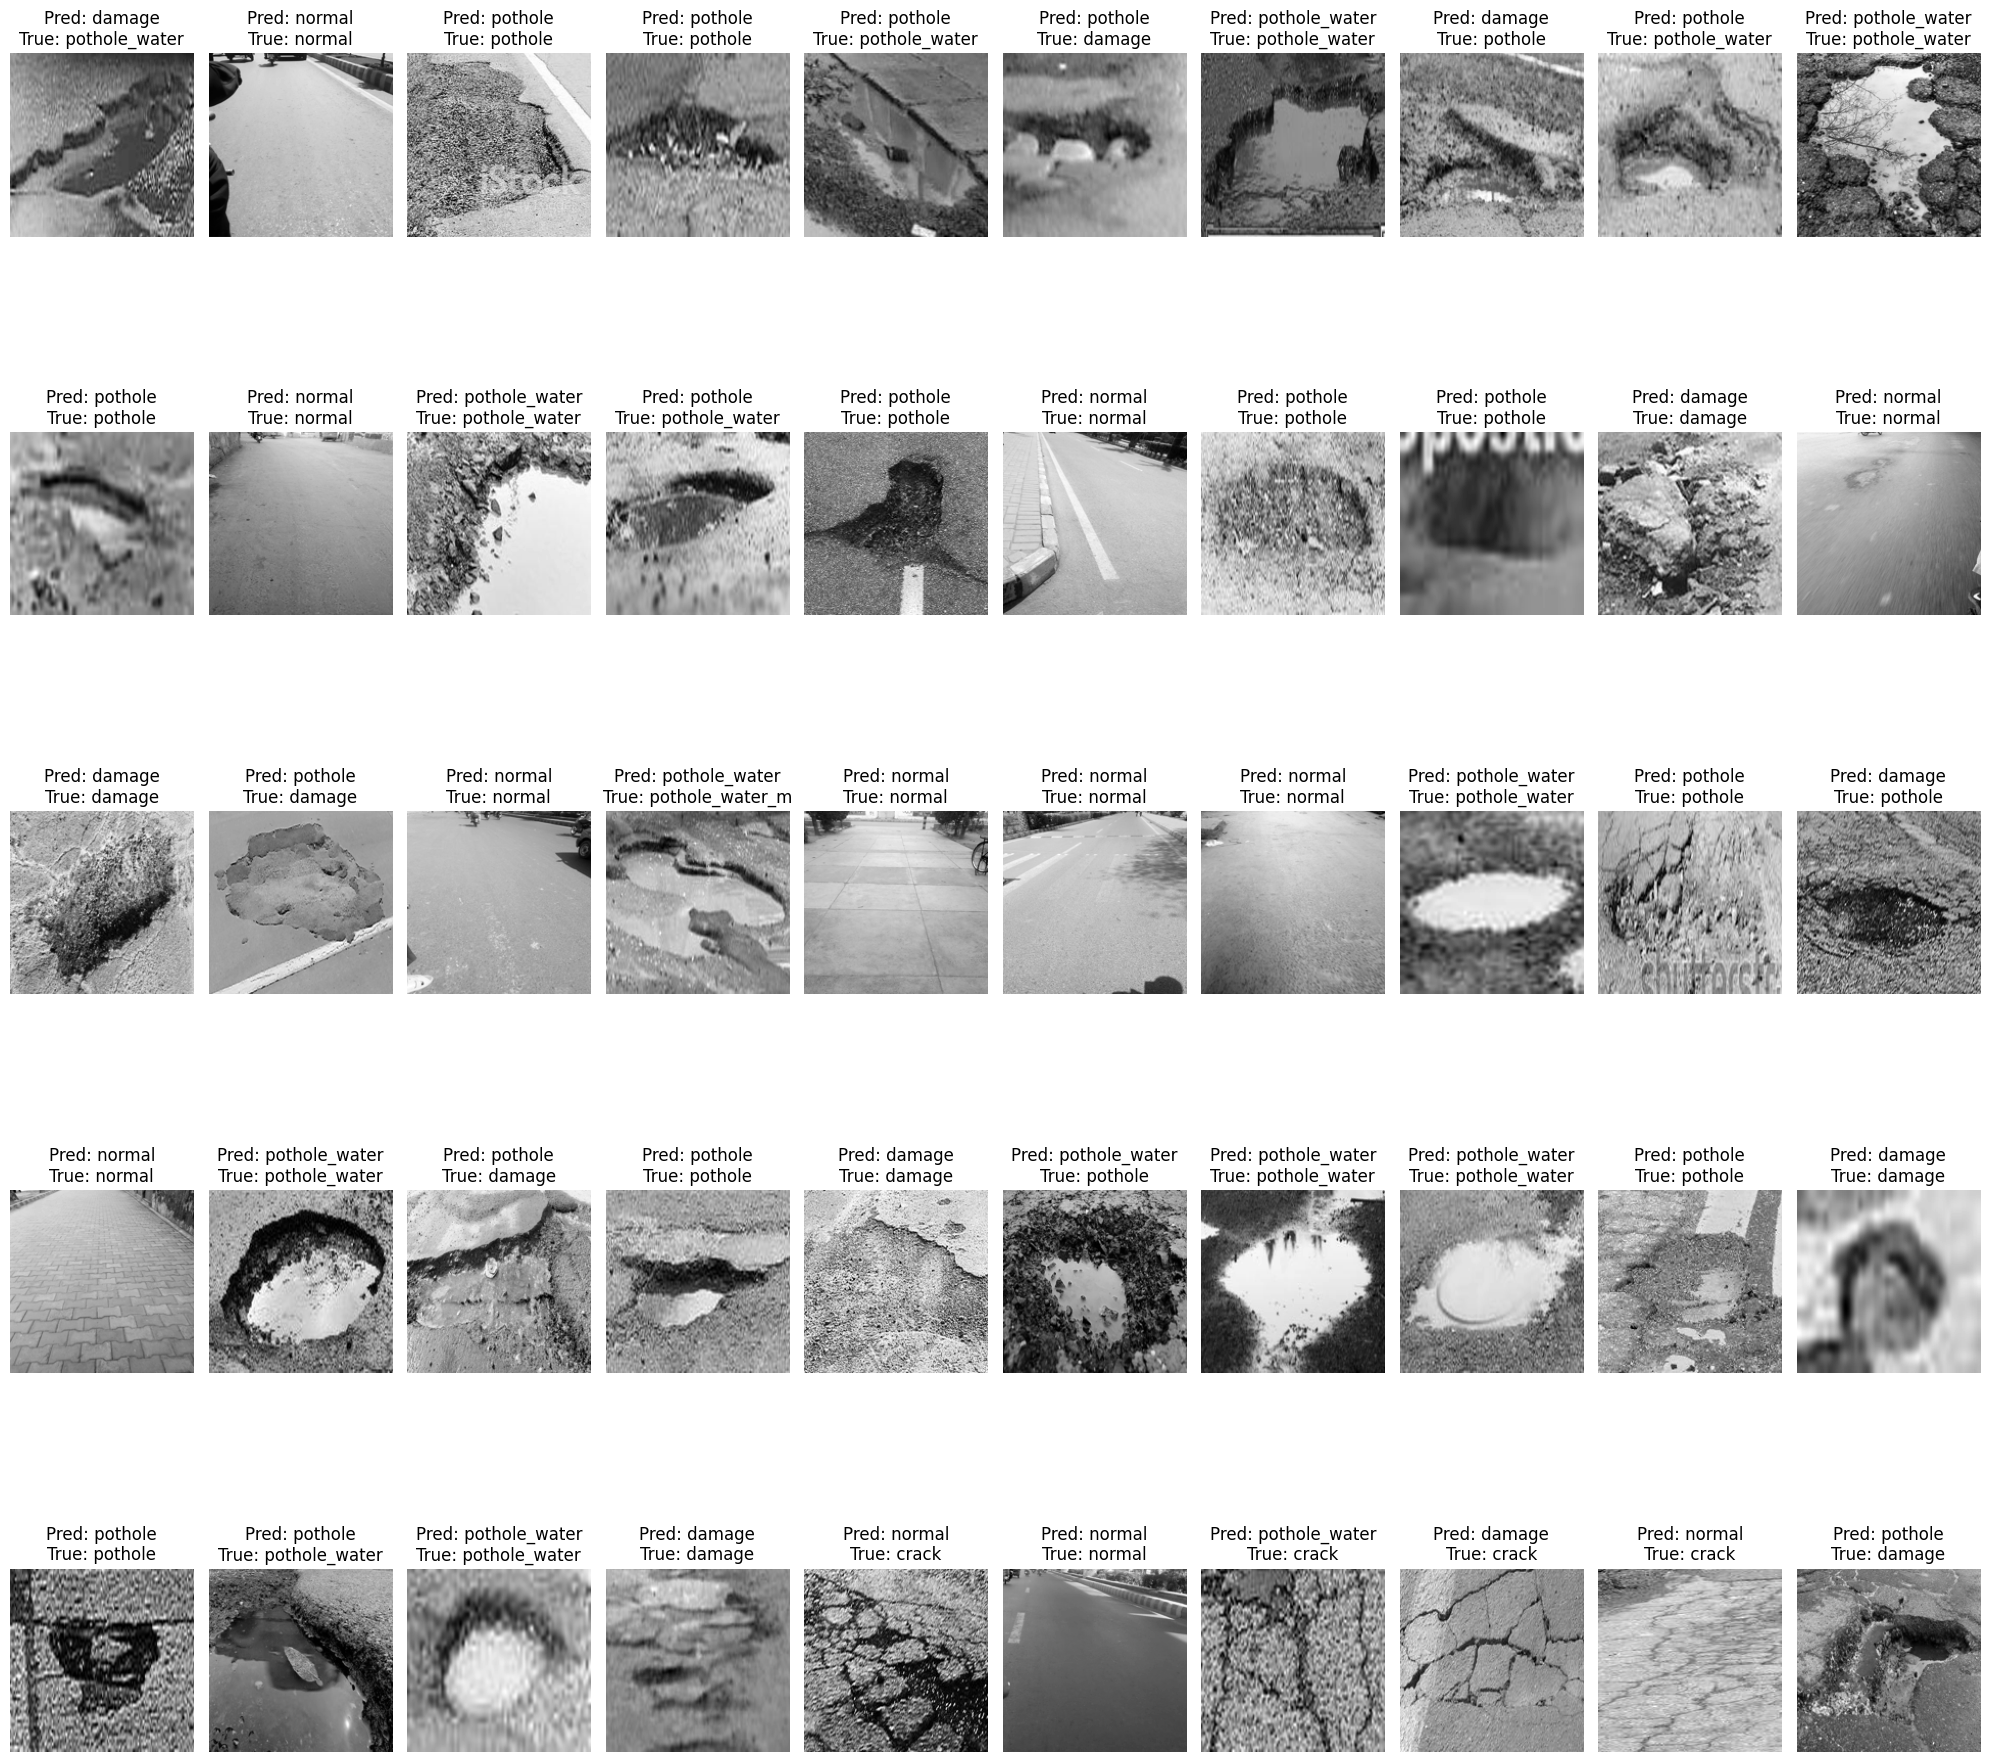

In [14]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

def load_data(data_dir, img_size=(32, 32)):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image_file)
                img = Image.open(img_path).convert("L").resize(img_size) 
                img_array = np.array(img).flatten() / 255.0  
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

data_dir = "./../data/clean/" 
img_size = (180, 180)
X, y = load_data(data_dir, img_size=img_size)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = np.eye(len(np.unique(y_encoded)))[y_encoded]

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
hidden_size = 64
output_size = y_onehot.shape[1]
learning_rate = 0.01
epochs = 2000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

for epoch in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    loss = -np.mean(np.sum(y_train * np.log(a2 + 1e-8), axis=1))
    
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = softmax(z2_test)

predictions = np.argmax(a2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(predictions == y_true)
print(f"Test accuracy: {accuracy:.4f}")
print(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
fig, axes = plt.subplots(5, 10, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(img_size), cmap="gray")
    ax.axis("off")
    pred_label = label_encoder.inverse_transform([predictions[i]])[0]
    true_label = label_encoder.inverse_transform([y_true[i]])[0]
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
plt.tight_layout()
plt.show()


Epoch 0, Loss: 1.6030
Epoch 10, Loss: 1.5261
Epoch 20, Loss: 1.4882
Epoch 30, Loss: 1.4730
Epoch 40, Loss: 1.4667
Epoch 50, Loss: 1.4633
Epoch 60, Loss: 1.4608
Epoch 70, Loss: 1.4585
Epoch 80, Loss: 1.4563
Epoch 90, Loss: 1.4540
Epoch 100, Loss: 1.4515
Epoch 110, Loss: 1.4489
Epoch 120, Loss: 1.4462
Epoch 130, Loss: 1.4432
Epoch 140, Loss: 1.4401
Epoch 150, Loss: 1.4368
Epoch 160, Loss: 1.4332
Epoch 170, Loss: 1.4294
Epoch 180, Loss: 1.4252
Epoch 190, Loss: 1.4208
Epoch 200, Loss: 1.4160
Epoch 210, Loss: 1.4108
Epoch 220, Loss: 1.4052
Epoch 230, Loss: 1.3992
Epoch 240, Loss: 1.3928
Epoch 250, Loss: 1.3860
Epoch 260, Loss: 1.3790
Epoch 270, Loss: 1.3718
Epoch 280, Loss: 1.3644
Epoch 290, Loss: 1.3568
Epoch 300, Loss: 1.3490
Epoch 310, Loss: 1.3411
Epoch 320, Loss: 1.3332
Epoch 330, Loss: 1.3252
Epoch 340, Loss: 1.3172
Epoch 350, Loss: 1.3093
Epoch 360, Loss: 1.3015
Epoch 370, Loss: 1.2938
Epoch 380, Loss: 1.2862
Epoch 390, Loss: 1.2788
Epoch 400, Loss: 1.2715
Epoch 410, Loss: 1.2644
Epo

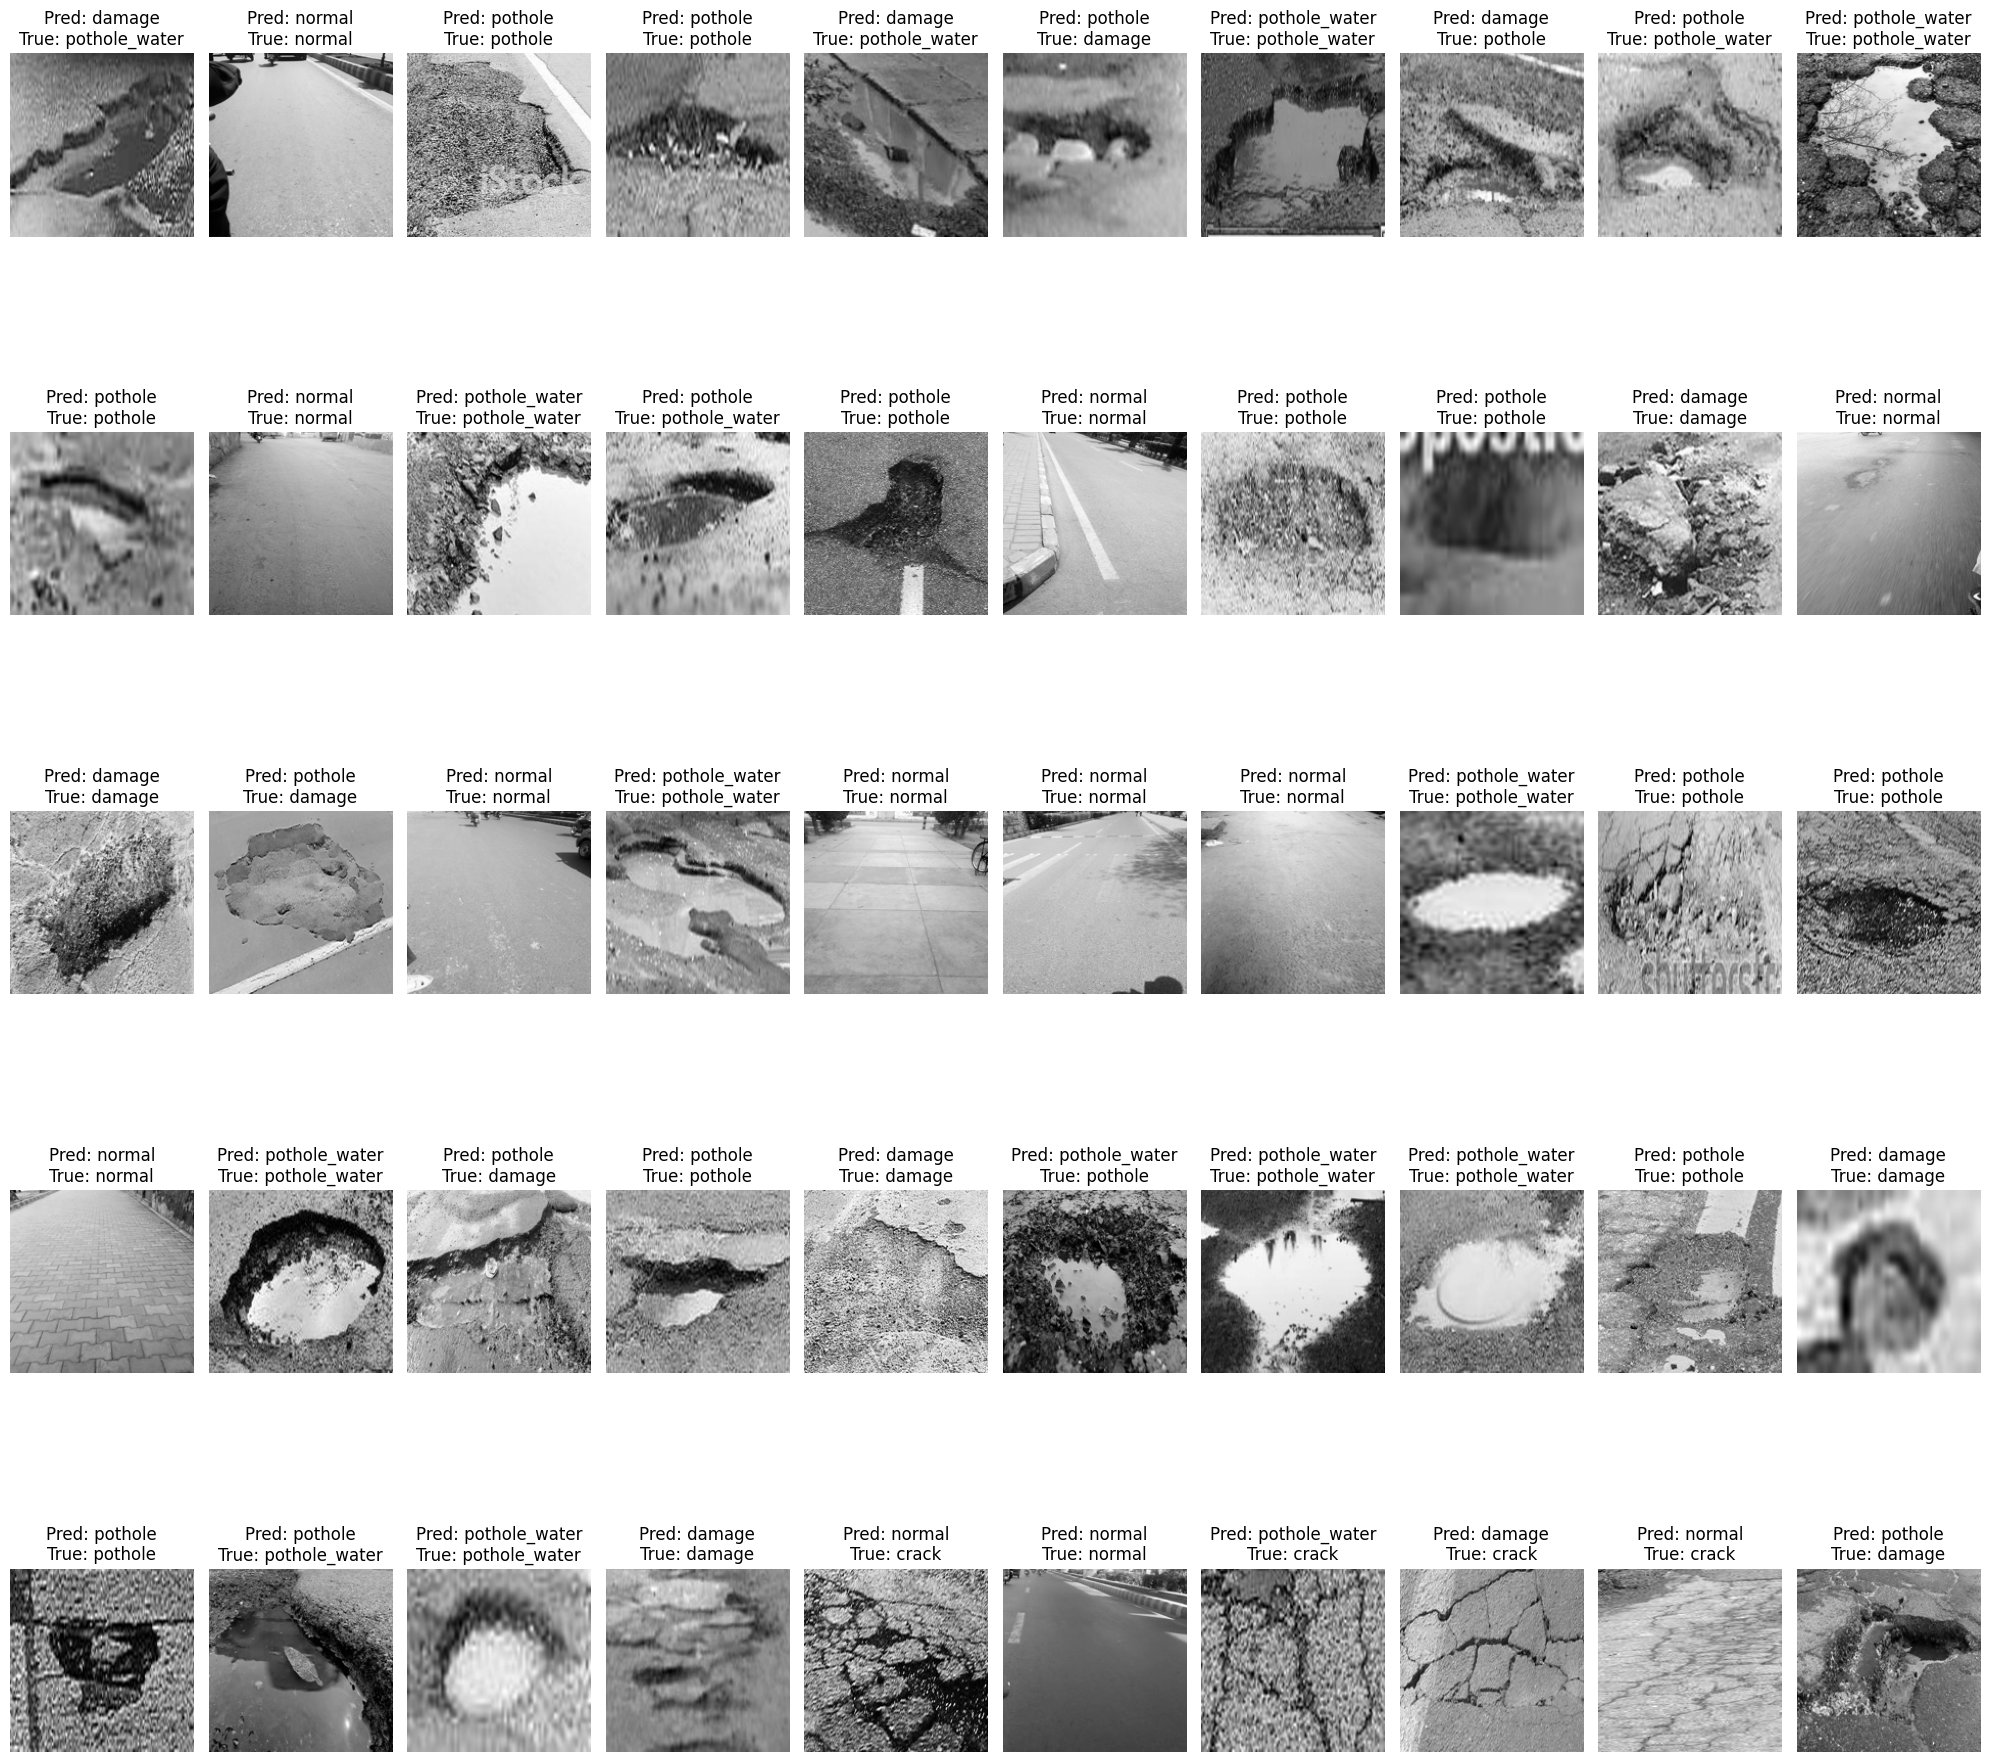

In [15]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def load_data(data_dir, img_size=(32, 32)):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image_file)
                img = Image.open(img_path).convert("L").resize(img_size) 
                img_array = np.array(img).flatten() / 255.0  
                images.append(img_array)
                
                # Ubah label `pothole_water_m` menjadi `pothole_water`
                if label == "pothole_water_m":
                    label = "pothole_water"
                labels.append(label)
    return np.array(images), np.array(labels)

data_dir = "./../data/clean/" 
img_size = (180, 180)
X, y = load_data(data_dir, img_size=img_size)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = np.eye(len(np.unique(y_encoded)))[y_encoded]

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
hidden_size = 64
output_size = y_onehot.shape[1]
learning_rate = 0.01
epochs = 2000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

for epoch in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    loss = -np.mean(np.sum(y_train * np.log(a2 + 1e-8), axis=1))
    
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = softmax(z2_test)

predictions = np.argmax(a2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(predictions == y_true)
print(f"Test accuracy: {accuracy:.4f}")

# Display label mappings
print(label_encoder.classes_)

fig, axes = plt.subplots(5, 10, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(img_size), cmap="gray")
    ax.axis("off")
    pred_label = label_encoder.inverse_transform([predictions[i]])[0]
    true_label = label_encoder.inverse_transform([y_true[i]])[0]
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
plt.tight_layout()
plt.show()


Epoch 0, Loss: 1.1047
Epoch 10, Loss: 1.0042
Epoch 20, Loss: 0.9749
Epoch 30, Loss: 0.9656
Epoch 40, Loss: 0.9610
Epoch 50, Loss: 0.9574
Epoch 60, Loss: 0.9538
Epoch 70, Loss: 0.9499
Epoch 80, Loss: 0.9458
Epoch 90, Loss: 0.9416
Epoch 100, Loss: 0.9370
Epoch 110, Loss: 0.9323
Epoch 120, Loss: 0.9272
Epoch 130, Loss: 0.9218
Epoch 140, Loss: 0.9160
Epoch 150, Loss: 0.9099
Epoch 160, Loss: 0.9035
Epoch 170, Loss: 0.8968
Epoch 180, Loss: 0.8897
Epoch 190, Loss: 0.8823
Epoch 200, Loss: 0.8746
Epoch 210, Loss: 0.8666
Epoch 220, Loss: 0.8584
Epoch 230, Loss: 0.8501
Epoch 240, Loss: 0.8417
Epoch 250, Loss: 0.8332
Epoch 260, Loss: 0.8248
Epoch 270, Loss: 0.8165
Epoch 280, Loss: 0.8084
Epoch 290, Loss: 0.8004
Epoch 300, Loss: 0.7927
Epoch 310, Loss: 0.7852
Epoch 320, Loss: 0.7780
Epoch 330, Loss: 0.7711
Epoch 340, Loss: 0.7645
Epoch 350, Loss: 0.7581
Epoch 360, Loss: 0.7520
Epoch 370, Loss: 0.7462
Epoch 380, Loss: 0.7406
Epoch 390, Loss: 0.7353
Epoch 400, Loss: 0.7301
Epoch 410, Loss: 0.7252
Epo

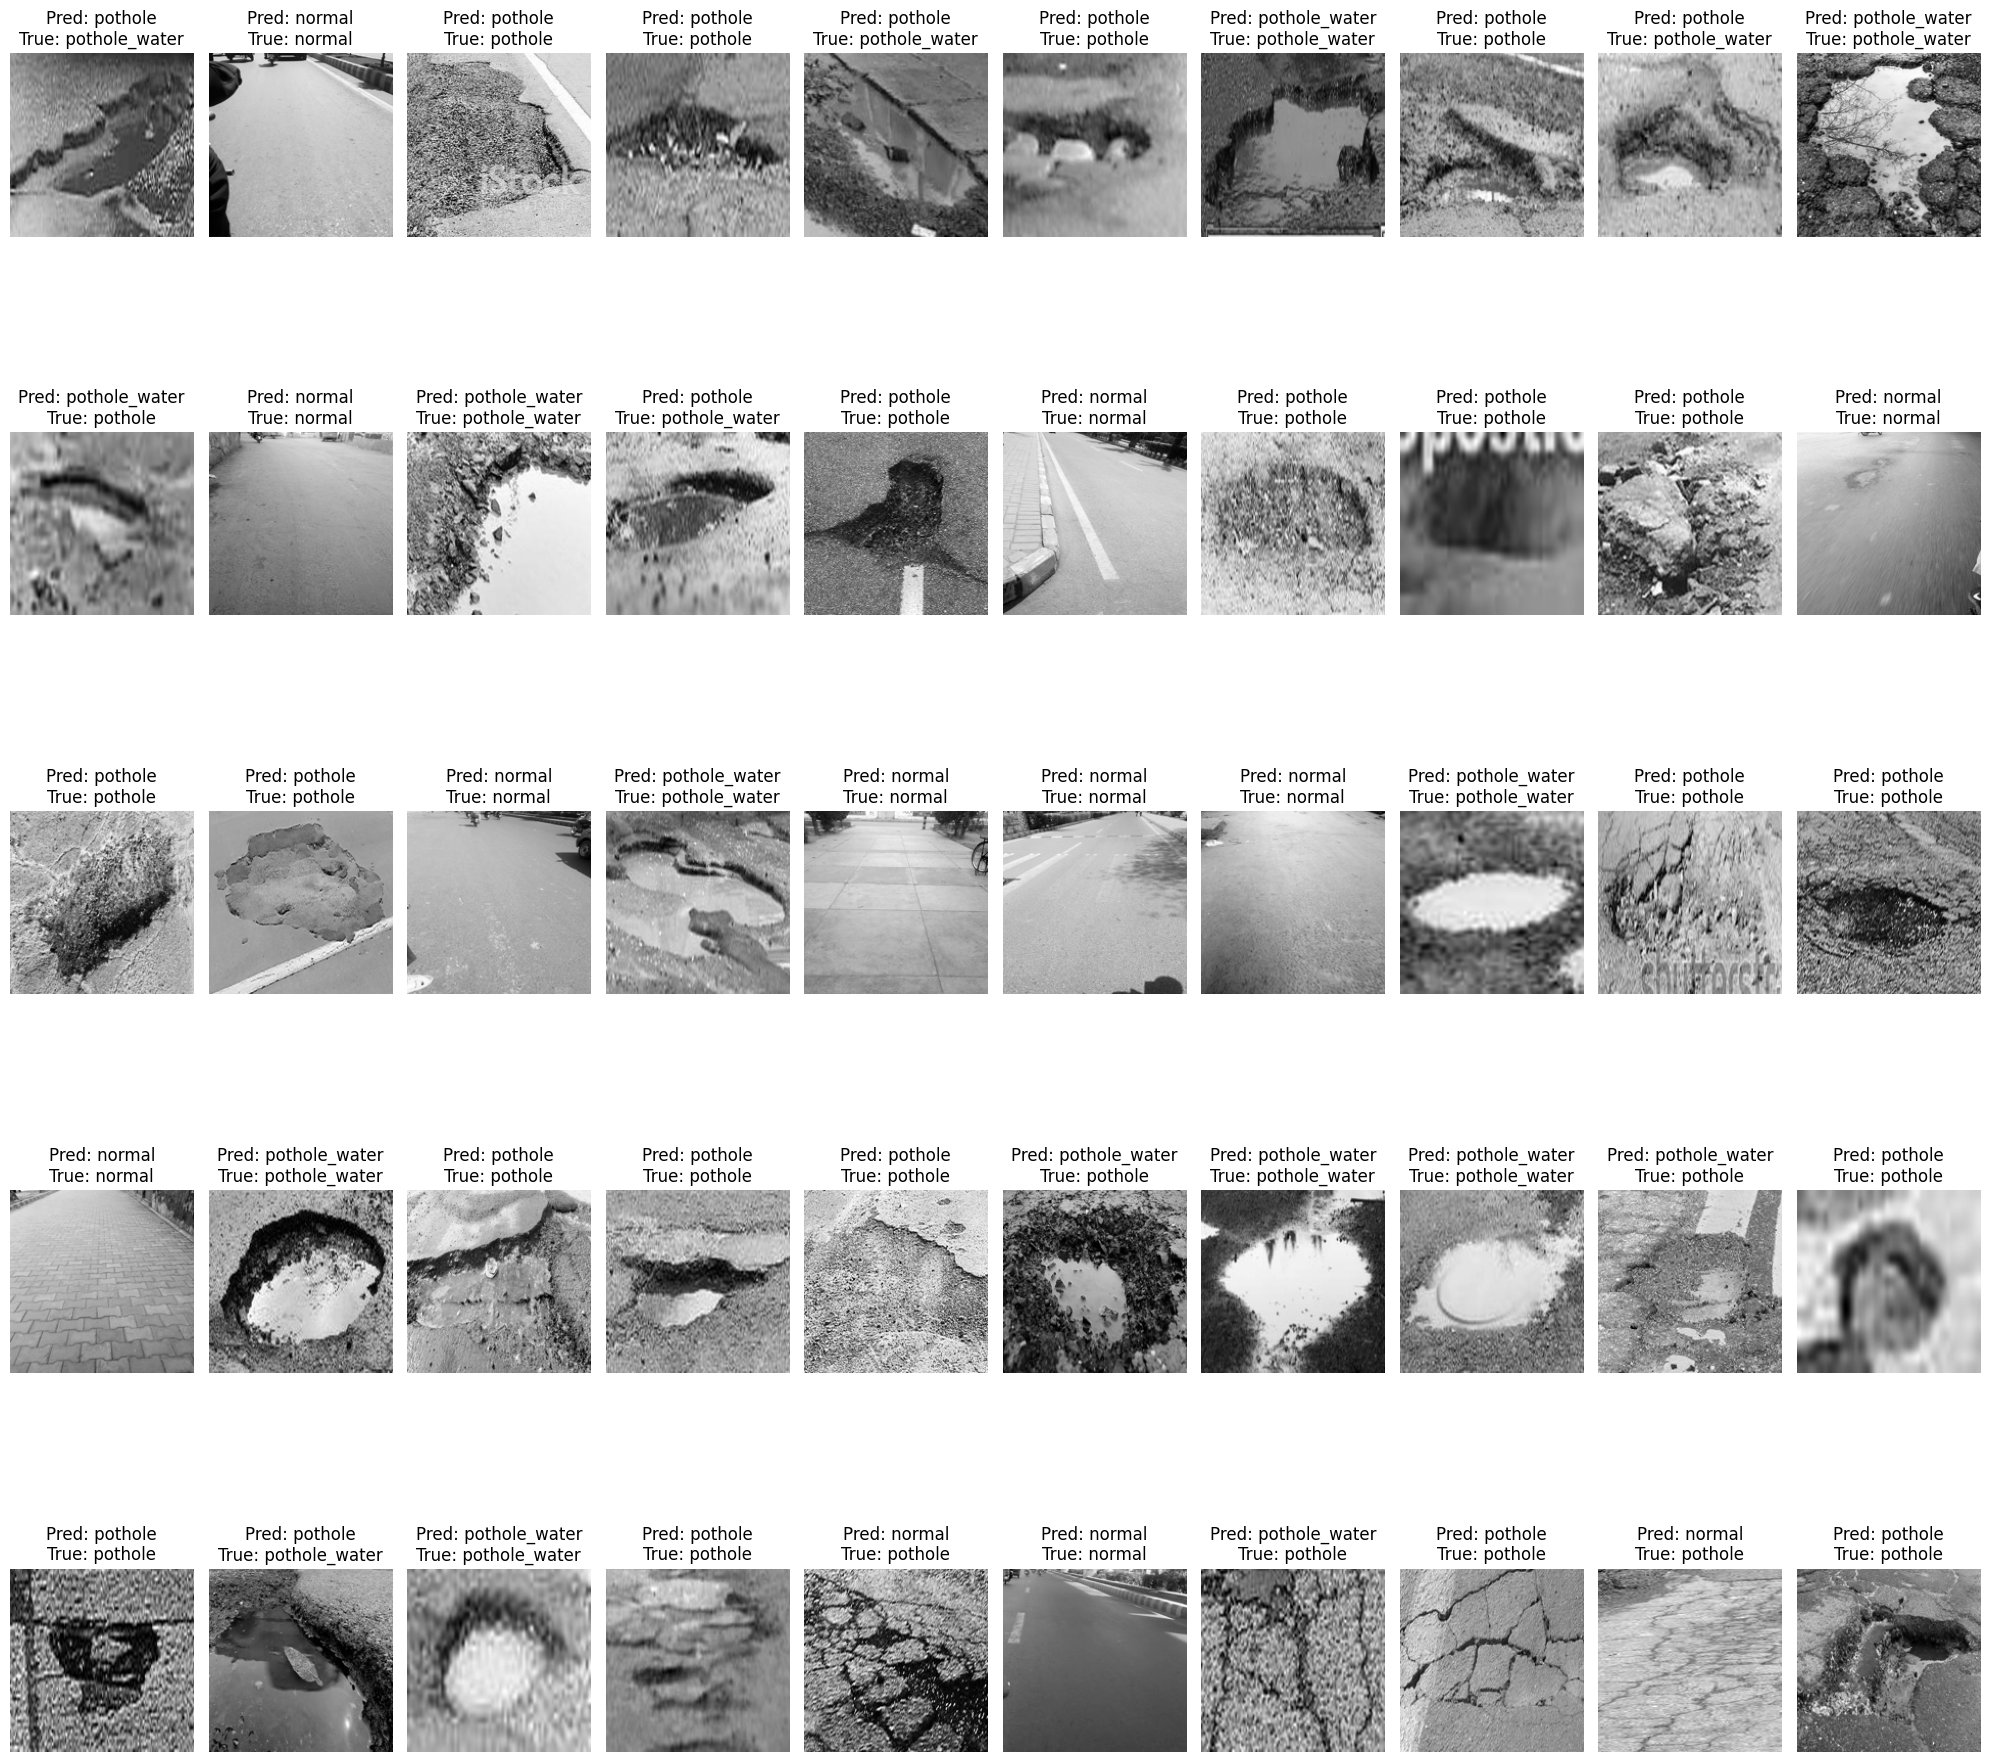

In [16]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def load_data(data_dir, img_size=(32, 32)):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image_file)
                img = Image.open(img_path).convert("L").resize(img_size) 
                img_array = np.array(img).flatten() / 255.0
                
                # Set all relevant labels to either "pothole" or "pothole_water"
                if label in ["crack", "damage", "pothole"]:
                    label = "pothole"
                elif label in ["pothole_water", "pothole_water_m"]:
                    label = "pothole_water"
                
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

data_dir = "./../data/clean/" 
img_size = (180, 180)
X, y = load_data(data_dir, img_size=img_size)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = np.eye(len(np.unique(y_encoded)))[y_encoded]

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
hidden_size = 64
output_size = y_onehot.shape[1]
learning_rate = 0.01
epochs = 2000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

for epoch in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    loss = -np.mean(np.sum(y_train * np.log(a2 + 1e-8), axis=1))
    
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = softmax(z2_test)

predictions = np.argmax(a2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(predictions == y_true)
print(f"Test accuracy: {accuracy:.4f}")

# Display label mappings
print(label_encoder.classes_)

fig, axes = plt.subplots(5, 10, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(img_size), cmap="gray")
    ax.axis("off")
    pred_label = label_encoder.inverse_transform([predictions[i]])[0]
    true_label = label_encoder.inverse_transform([y_true[i]])[0]
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
plt.tight_layout()
plt.show()
